In [1]:
from ioMicro import *

In [2]:
save_fls = glob.glob(r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisSmFISH\Conv_zscan__059--*__Xhfits.npz')

In [ ]:
##DCX -> https://docs.google.com/spreadsheets/d/1kXWCTCblR9ZmXRF0ztCsRG_UG7340kBi2AjBoqoZn7Q/edit#gid=120480373

In [72]:
# r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\MERFISH_AnalysisP12'
# r'\\192.168.0.7\bbfishmahsa\CGBB_embryo_4_28_2023\MERFISH_AnalysisP34'
# r'\\192.168.0.6\bbfishjoy4extra\MERFISH_AnalysisP56' ...
save_folder_ = r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\MERFISH_AnalysisP12'


In [188]:
dec = decoder_simple(save_folder_,fov='Conv_zscan__059',set_='_D16')
dec.load_decoded()

Loaded decoded: -9.168317317962646


100%|██████████████████████████████████████████████████████████████████████████████████| 48/48 [00:09<00:00,  5.08it/s]


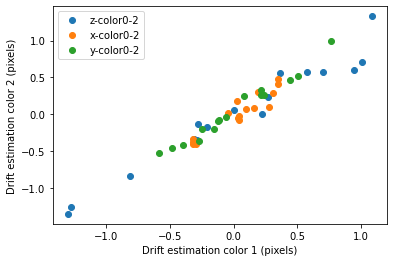

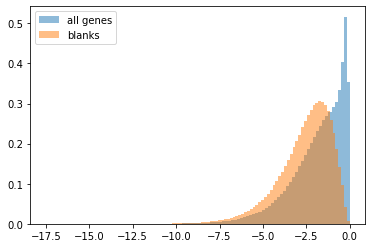

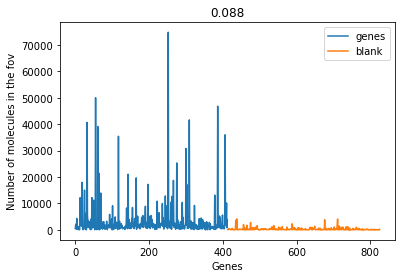

In [189]:
apply_fine_drift(dec,plt_val=True)
dec.ncols=3
scoresRef = get_score_per_color(dec)
get_score_withRef(dec,scoresRef,plt_val=True,gene=None,iSs = None)
dec.th=-1.
plot_statistics(dec)

In [78]:
dec.XH_pruned.shape

(5038660, 4, 10)

In [190]:
ign = list(dec.gns_names).index('Dcx')
keep_gene = dec.icodesN==ign
XH_gene = dec.XH_pruned[keep_gene]
score_gene = dec.scoreA[keep_gene]
#XH_gene.shape
XH_gene = XH_gene[score_gene>-1.5]
XH_gene.shape

(14854, 4, 10)

In [101]:
Xh_gene = np.mean(XH_gene,axis=1)[:,:8]

In [122]:
Xh_smFISH = Xh.copy()
Xh_smFISH = Xh_smFISH[Xh_smFISH[:,-1]>np.exp(10)]

In [245]:
resc0 = resc = 3
XredsmFISH = (Xh_smFISH[:,0:3]/resc).astype(int)
XredMER = (Xh_gene[:,0:3]/resc).astype(int)
szmax = np.max(list(XredsmFISH)+list(XredMER),axis=0)+1
im1,im2 = np.zeros(szmax),np.zeros(szmax)
im1[tuple(XredsmFISH.T)]=1
im2[tuple(XredMER.T)]=1
from scipy.signal import fftconvolve
cor_im =fftconvolve(im1,im2[::-1,::-1,::-1],mode='full')
drift = (np.array(np.unravel_index(np.argmax(cor_im),cor_im.shape))-im1.shape+1)*resc
print(drift)
resc = 1
XredsmFISH = (Xh_smFISH[:,0:3]/resc).astype(int)
XredMER = ((Xh_gene[:,0:3]+drift)/resc).astype(int)
XredMER = XredMER[np.all(XredMER>=0,axis=-1)]
szmax = np.max(list(XredsmFISH)+list(XredMER),axis=0)+1
im1,im2 = np.zeros(szmax),np.zeros(szmax)
im1[tuple(XredsmFISH.T)]=1
im2[tuple(XredMER.T)]=1

[   3 -165   54]


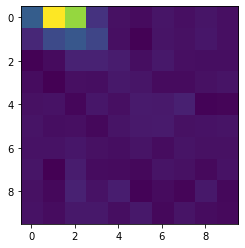

In [256]:
from scipy.signal import convolve
plt.imshow(convolve(np.sum(im2,axis=0)[resc0*3:,resc0*3:],np.sum(im1,axis=0)[::-1,::-1],mode='valid'))

In [ ]:
resc = 1
XredsmFISH = (Xh_smFISH[:,0:3]/resc).astype(int)
XredMER = ((Xh_gene[:,0:3]+drift)/resc).astype(int)
XredMER = XredMER[np.all(XredMER>=0,axis=-1)]
szmax = np.max(list(XredsmFISH)+list(XredMER),axis=0)+1
im1,im2 = np.zeros(szmax),np.zeros(szmax)
im1[tuple(XredsmFISH.T)]=1
im2[tuple(XredMER.T)]=1

In [238]:

means = []
for ix in range(-resc0,resc0+1):
    for iy in range(-resc0,resc0+1):
        for iz in tqdm(range(-resc0,resc0+1)):
            drift_ = [ix,iy,iz]
            slices1 = tuple([slice(max(x_-1,0),min(x_-1,-1)) for x_ in drift_])
            slices2 = tuple([slice(max(-x_,0),min(-x_,-1)) for x_ in drift_])
            means.append(np.mean(im1[slices1]*im2[slices2]))

 57%|████████████████████████████████████████████████                                    | 4/7 [00:04<00:03,  1.05s/it]


KeyboardInterrupt: 

In [ ]:
means

In [230]:
vv = napari.view_image(np.max(im1,axis=0),colormap='red',blending='additive')
vv.add_image(np.max(im2,axis=0),colormap='green',blending='additive')

<Image layer 'Image [1]' at 0x20f79595a60>

In [222]:
slices1 = tuple([slice(max(x_-1,0),min(x_-1,-1)) for x_ in drift//resc])
slices2 = tuple([slice(max(-x_,0),min(-x_,-1)) for x_ in drift//resc])

In [223]:
#slices2,slices1
im1[slices1].shape,im2[slices2].shape

((9, 911, 949), (9, 911, 949))

In [224]:
vv = napari.view_image(np.max(im1[slices1],axis=0),colormap='red',blending='additive')
vv.add_image(np.max(im2[slices2],axis=0),colormap='green',blending='additive')

<Image layer 'Image [1]' at 0x20f7865fb80>

In [ ]:
convolve(im1,im2[::-1,::-1,::-1],mode='full')

In [180]:

#plt.imshow(cor_im)

array([   3, -165,   54], dtype=int64)

In [183]:
Xh_gene_ = Xh_gene.copy()
Xh_gene_[:,0:3]+=drift

In [185]:
viewer = None
viewer = plot_Xh(Xh,gene='Dcx',viewer = viewer,vmax=50000,hcutoff=np.exp(10),color='g')
viewer = plot_Xh(Xh_gene_,gene='Dcx_MER',viewer = viewer,vmax=50000,hcutoff=0,color='m')

In [118]:
def plot_Xh(Xh,gene='Dcx',viewer = None,vmax=50000,hcutoff=np.exp(9.5),color='g',min_sz=1,max_sz=5):
    H = Xh[:,-1]
    keep  = H>hcutoff
    H = Xh[keep,-1]
    X = Xh[keep,:3]
    
    size = min_sz+np.clip(H/vmax,0,1)*(max_sz-min_sz)
    
    if viewer is None:
        import napari
        viewer = napari.Viewer()

    
    viewer.add_points(X,size=size,edge_color=color,name=gene,face_color=[0,0,0,0],blending='additive')
    return viewer

In [121]:
viewer = None
viewer = plot_Xh(Xh,gene='Dcx',viewer = viewer,vmax=50000,hcutoff=np.exp(10),color='g')
viewer = plot_Xh(Xh_gene,gene='Dcx_MER',viewer = viewer,vmax=50000,hcutoff=0,color='m')

In [186]:
viewer.add_image(read_im(fl_raw)[icol])

<Image layer 'Image' at 0x20df964e6a0>

In [ ]:
def get_gene(dec)

In [6]:
dic = {'H97': ['Spi1', 'Runx2', 'Ptprc'],
'H98': ['Sox10', 'Irf8', 'Sall1'],
'H99':  ['Runx1', 'Aif1', 'Sall3'],
'H100': ['Cx3cr1', 'Chat', 'Mrc2'],
'H101': ['Mef2c', 'Dcx', 'Runx3'],
'H102': ['Cldn5', 'Fxyd7', 'Itgam'],
'H103': ['Tnc', 'Slc17a6', 'Tgfb2'],
'H104': ['Lyve1', 'Stmn2', 'Mki67'],
'H105': ['Spp1', 'Vtn', 'Olig1'],
'H106':  ['Olig2', '', 'Agt'],
'H107': ['Gfap', '', 'Cnr1'],
'H108': ['Neurog2', '', 'Lhx9'],
'H109': ['Kcnc2', '', 'Nnat'],
'H110': ['Sox10', 'Dcx', 'Sall1']}

In [7]:
def get_fl(save_fls,tags=['H110','col1']):
    fl_ = [fl for fl in save_fls 
              if np.all([(tag in os.path.basename(fl)) for tag in tags])]
    return fl_

In [15]:
fl = get_fl(save_fls,tags=['H110','col1'])[0]
Xh = np.load(fl)['Xh']

In [96]:
H = Xh[:,-1]
hcutoff=np.exp(10)
keep  = H>hcutoff
np.sum(keep)

52429

In [ ]:
viewer = plot_Xh(Xh,gene='Dcx',viewer = None,vmax=50000,hcutoff=np.exp(9.5))

In [69]:
viewer = plot_Xh(Xh,gene='Dcx',viewer = viewer,vmax=50000,hcutoff=np.exp(10),color='c')

In [39]:
fov,h_fld,icol = os.path.basename(fl).split('--')
icol = int(icol.split('_')[0].replace('col',''))

In [33]:
data_folders = [r'\\192.168.0.7\bbfishmahsa\CGBB_embryo_4_28_2023', r'\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023']
fl_raw = [data_fld+os.sep+h_fld+os.sep+fov+'.zarr' for data_fld in data_folders if os.path.exists(data_fld+os.sep+h_fld+os.sep+fov+'.zarr')][0]

In [257]:
print(fl_raw)

\\192.168.0.6\bbfishjoy4\CGBB_embryo_4_28_2023\H110_MER_D16\Conv_zscan__059.zarr


In [54]:
points_bad = viewer.layers[-1].data[0][:,1:]
points_good = viewer.layers[-2].data[0][:,1:]

In [62]:
from shapely.geometry import Point, Polygon
shape_good = Polygon(points_good)
shape_bad = Polygon(points_bad)
h_good = [x_[-3] for x_ in Xh if Point(x_[1],x_[2]).within(shape_good)]
h_bad = [x_[-3] for x_ in Xh if Point(x_[1],x_[2]).within(shape_bad)]

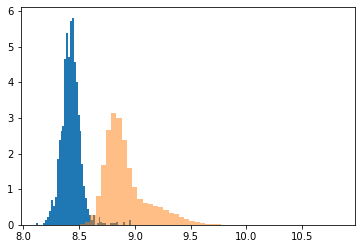

In [63]:
plt.hist(np.log(h_bad),density=True,bins=50)
plt.hist(np.log(h_good),density=True,bins=50,alpha=0.5);

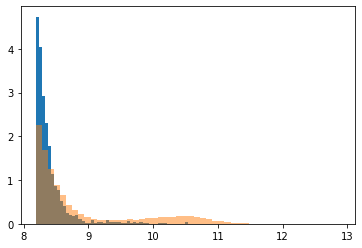

In [61]:
plt.hist(np.log(h_bad),density=True,bins=50)
plt.hist(np.log(h_good),density=True,bins=50,alpha=0.5);

In [50]:
import shapely

In [43]:
viewer.add_image(read_im(fl_raw)[icol])

<Image layer 'Image' at 0x20dfa4381f0>

C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\napari\layers\base\base.py:1597: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\napari\layers\base\base.py:1597: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\napari\layers\base\base.py:1597: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\napari\layers\base\base.py:1597: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\BintuLabUser\anaconda3\envs\cellpose\lib\site-packages\napari\layers\base\base.py:1597: RuntimeWarning: invalid value encountered in cast
  corners[:, displayed_axes] = data_bbox_clipped
C:\Users\BintuLabUse

In [ ]:
zc,xc,yc,bk, correlation with psf of original data,brightness - original,correlation with psf of deconvolve data, brightness - deconvolved